# Support Vector Regression (SVR)

## Importing the libraries

In [107]:
import pandas as pd

## Importing the dataset

In [108]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1 : len(df)].values

In [109]:
def print_data_info(X, y):
   for i in range(len(X)):
       print(f"Level {i}: {X[i]}, Salary: {y[i]}")

In [110]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [111]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [112]:
print_data_info(X, y)

Level 0: [1], Salary: [45000]
Level 1: [2], Salary: [50000]
Level 2: [3], Salary: [60000]
Level 3: [4], Salary: [80000]
Level 4: [5], Salary: [110000]
Level 5: [6], Salary: [150000]
Level 6: [7], Salary: [200000]
Level 7: [8], Salary: [300000]
Level 8: [9], Salary: [500000]
Level 9: [10], Salary: [1000000]


## Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
def print_scaled_features(X, y):
    for i in range(len(X)):
        print(f"scaled_Level {i}: {X[i]}, scaled_Salary: {y[i]}")

print_scaled_features(X, y)

scaled_Level 0: [-1.5666989], scaled_Salary: [-0.72004253]
scaled_Level 1: [-1.21854359], scaled_Salary: [-0.70243757]
scaled_Level 2: [-0.87038828], scaled_Salary: [-0.66722767]
scaled_Level 3: [-0.52223297], scaled_Salary: [-0.59680786]
scaled_Level 4: [-0.17407766], scaled_Salary: [-0.49117815]
scaled_Level 5: [0.17407766], scaled_Salary: [-0.35033854]
scaled_Level 6: [0.52223297], scaled_Salary: [-0.17428902]
scaled_Level 7: [0.87038828], scaled_Salary: [0.17781001]
scaled_Level 8: [1.21854359], scaled_Salary: [0.88200808]
scaled_Level 9: [1.5666989], scaled_Salary: [2.64250325]


In [115]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [116]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [117]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

In [118]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Predicting a new result

In [119]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualising the SVR results

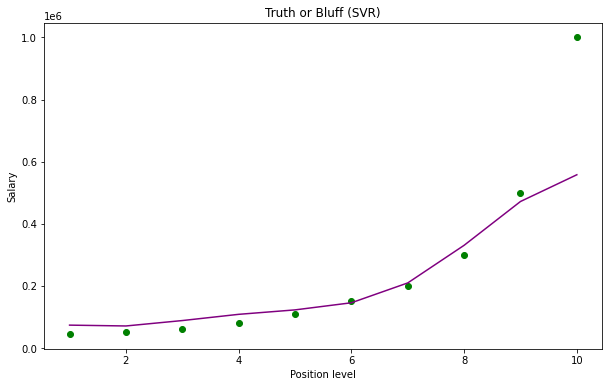

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='green')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='purple')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


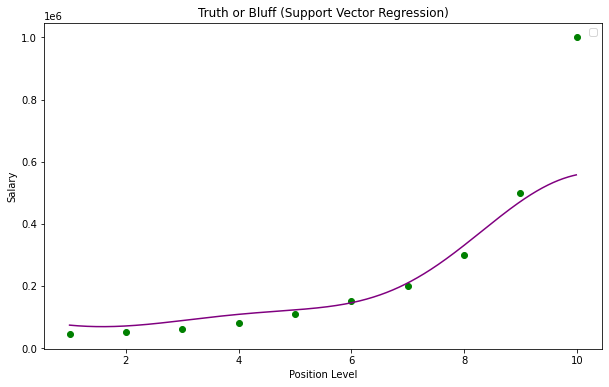

In [122]:
import numpy as np
plt.figure(figsize=(10, 6))
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='green')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='purple')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()